In [49]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean as cm
from mpl_toolkits.basemap import Basemap, shiftgrid
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as b:
    bathy=b.variables['Bathymetry'][:]
    nav_lon=b.variables['nav_lon'][:]
    nav_lat=b.variables['nav_lat'][:]


In [3]:
lonmin=np.min(nav_lon)-.01
lonmax=np.max(nav_lon)+.01
latmin=np.min(nav_lat)-.01
latmax=np.max(nav_lat)+.01
print(lonmin,lonmax,latmin,latmax)

-126.410291443 -121.308351746 46.849664917 51.114801178


In [6]:
nav_lon.shape

(898, 398)

In [11]:
thalweg_pts = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=' ', dtype=int)
thlons=[nav_lon[jj,ii] for (jj,ii) in thalweg_pts]
thlats=[nav_lat[jj,ii] for (jj,ii) in thalweg_pts]

In [43]:
cmb=cm.cm.deep
cmb.set_bad('grey')

In [51]:
bathy

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 0.0)

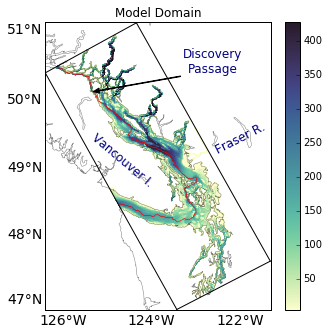

In [62]:
fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor('none')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')

p2=m.plot(nav_lon[0,:],nav_lat[0,:],'k-',latlon=True)
p2=m.plot(nav_lon[-1,:],nav_lat[-1,:],'k-',latlon=True)
p2=m.plot(nav_lon[:,0],nav_lat[:,0],'k-',latlon=True)
p2=m.plot(nav_lon[:,-1],nav_lat[:,-1],'k-',latlon=True)

#m.fillcontinents(color=(.6,.9,.6),lake_color=(.9,1,.9))
pl=m.drawcoastlines(linewidth=.5)
pl.set_alpha(0.5)
#m.drawrivers(color=(.9,1,.9),linewidth=2)

p=m.pcolor(nav_lon,nav_lat,bathy,latlon=True,cmap=cmb)

m.drawparallels(np.arange(np.round(latmin),np.round(latmax)+1,1),labels=[1,0,0,0], linewidth=0.0,fontsize=14)
m.drawmeridians(np.arange(np.round(lonmin),np.round(lonmax)+1,2),labels=[0,0,0,1], linewidth=0.0,fontsize=14)

x,y = m(-125.4,49.4)
plt.text(x,y,'Vancouver I.',size=12, rotation=-40.0,color='navy')
x,y = m(-122.6,49.55)
plt.text(x,y,'Fraser R.',size=12, rotation = 27.0,color='navy')
plt.title('Model Domain')
m.plot(thlons,thlats,'r-',latlon=True,linewidth=.5)
disx,disy=m(-125.316526,50.117820)
ax.annotate('Discovery\nPassage', xy=(disx, disy), xytext=(disx+300000, disy+75000),color='navy',
            arrowprops=dict(color='k',width=.5,headwidth=5,headlength=6),fontsize=12,
             horizontalalignment='center',verticalalignment='center')
cb=fig.colorbar(p)


fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/Bathy_Thalweg.png',dpi=400,transparent=True)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/Bathy_Thalweg.eps',dpi=400,transparent=True)
#fig.savefig('/home/eolson/pyCode/notebooks/figs/mapLabeled.pdf')